In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [124]:
# Load CSV file as dataframe

df = pd.read_csv("data/conflict_articles_cleaned_handlabeled.csv")
df

,summary,date,chat_GPT_location,lat,lng,article_id,cd_district_name,hunger_bert,refugees_bert,humanitarian_bert,conflict_bert,Conflict,County level,Unity level,South Sudan / Liberation movement Conflict,Additional Notes
0,The article discusses the killing of rebel lea...,2011-07-23,Koch county,8.684727,29.881520,299,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
1,The article discusses the killing of South Sud...,2011-07-23,Unity state,8.927721,29.788925,327,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
2,The article discusses the death of rebel leade...,2011-07-25,Bentiu,9.231487,29.800503,371,Rubkona,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
3,The article discusses the assassination of Gat...,2011-08-05,Unity state,8.927721,29.788925,493,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
4,The article discusses the challenges faced by ...,2011-10-20,Unity state,8.927721,29.788925,934,Koch,False,False,False,True,1,no,yes,no,Very broadly mentioned challenges faced by Sou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,The article discusses how transnational oil co...,2019-03-05,Unity state,8.927721,29.788925,16928,Koch,False,False,False,True,1,no,yes,no,How oil companies helped killing civilians
285,The article discusses a report by the Commissi...,2019-03-13,Bentiu,9.231487,29.800503,16929,Rubkona,True,True,True,True,2,yes,no,no,African Union should persecute rapists and mur...
286,The article discusses the intensification of a...,2022-09-26,Unity State,8.927721,29.788925,18427,Koch,False,False,False,True,2,no,yes,yes,Fighting between civilians
287,The article discusses a UN report documenting ...,2022-09-06,Unity state,8.927721,29.788925,18439,Koch,True,True,True,True,1,no,yes,yes,Widespread human rights violations


### Create a pie chart that shows where all articles come from

{'Rubkona', 'Koch'}


(-1.0999983499183985,
 1.099999558511648,
 -1.0999999258070263,
 1.099998919803274)

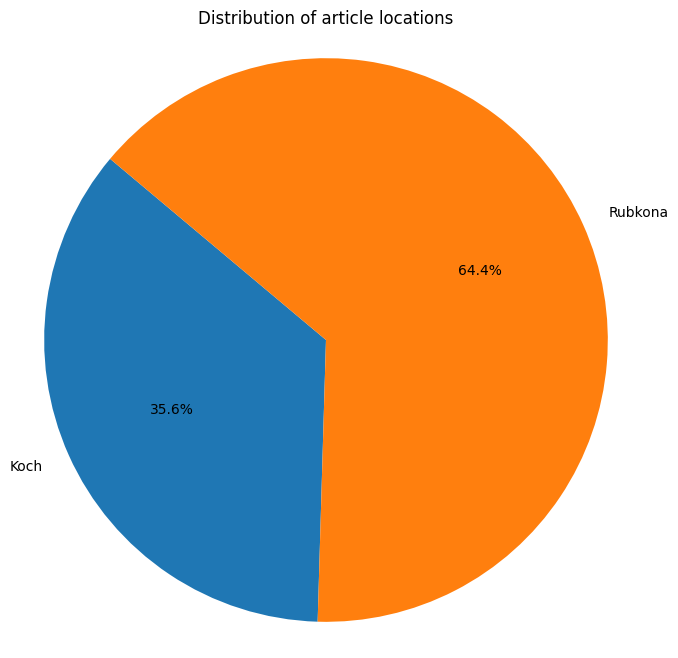

In [125]:
count_koch = 0
count_bentiu = 0
count_rubkona = 0
count_unity = 0
count_parieng = 0
count_mayiandit = 0
count_else = 0

for name in df["cd_district_name"]:
    if "koch" in name.lower():
        count_koch += 1
    elif "unity" in name.lower():
        count_koch += 1
        count_rubkona += 1
        count_parieng += 1
        count_mayiandit += 1
    elif "parieng" in name.lower():
        count_parieng += 1
    elif "mayiandit" in name.lower():
        count_mayiandit += 1
    elif "bentiu" in name.lower():
        count_rubkona += 1
    elif "rubkona" in name.lower():
        count_rubkona += 1
    else:
        count_else += 1

print(set(df['cd_district_name']))
# print(len(df["cd_district_name"]))
# print(count_koch+count_bentiu+count_rubkona+count_unity+count_else)
    
# Create a pie chart using the "Conflict" column
plt.figure(figsize=(8, 8))
# plt.pie([count_koch, count_rubkona, count_parieng, count_mayiandit, count_else], labels=["Koch", "Rubkona", "Parieng", "Mayiandit", "Other"], autopct='%1.1f%%', startangle=140)
plt.pie([count_koch, count_rubkona], labels=["Koch", "Rubkona"], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of article locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

### Create a new dataframe with all names lower case and split county's in separate dataframes

In [126]:
# Lower case all strings in a new dataframe
df_lowercase = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

df


,summary,date,chat_GPT_location,lat,lng,article_id,cd_district_name,hunger_bert,refugees_bert,humanitarian_bert,conflict_bert,Conflict,County level,Unity level,South Sudan / Liberation movement Conflict,Additional Notes
0,The article discusses the killing of rebel lea...,2011-07-23,Koch county,8.684727,29.881520,299,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
1,The article discusses the killing of South Sud...,2011-07-23,Unity state,8.927721,29.788925,327,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
2,The article discusses the death of rebel leade...,2011-07-25,Bentiu,9.231487,29.800503,371,Rubkona,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
3,The article discusses the assassination of Gat...,2011-08-05,Unity state,8.927721,29.788925,493,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
4,The article discusses the challenges faced by ...,2011-10-20,Unity state,8.927721,29.788925,934,Koch,False,False,False,True,1,no,yes,no,Very broadly mentioned challenges faced by Sou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,The article discusses how transnational oil co...,2019-03-05,Unity state,8.927721,29.788925,16928,Koch,False,False,False,True,1,no,yes,no,How oil companies helped killing civilians
285,The article discusses a report by the Commissi...,2019-03-13,Bentiu,9.231487,29.800503,16929,Rubkona,True,True,True,True,2,yes,no,no,African Union should persecute rapists and mur...
286,The article discusses the intensification of a...,2022-09-26,Unity State,8.927721,29.788925,18427,Koch,False,False,False,True,2,no,yes,yes,Fighting between civilians
287,The article discusses a UN report documenting ...,2022-09-06,Unity state,8.927721,29.788925,18439,Koch,True,True,True,True,1,no,yes,yes,Widespread human rights violations


In [127]:
# Create dataframe with only Koch
substring_to_find = 'koch'

# Create a boolean mask to filter rows containing the substring
mask_koch = df_lowercase['cd_district_name'].str.contains(substring_to_find)

# Use the boolean mask to extract rows containing the substring
df_koch = df[mask_koch]
koch_mean_conflict = df_koch["Conflict"].mean()

In [128]:
# Create dataframe with only Rubkona
substring_to_find = "rubkona"

# Create a boolean mask to filter rows containing the substring
mask_rubkona = df_lowercase['cd_district_name'].str.contains(substring_to_find)

# Use the boolean mask to extract rows containing the substring
df_rubkona = df[mask_rubkona]
rubkona_mean_conflict = df_rubkona["Conflict"].mean()

In [129]:
# Create dataframe with only Parieng
substring_to_find = 'parieng'

# Create a boolean mask to filter rows containing the substring
mask_parieng = df_lowercase['cd_district_name'].str.contains(substring_to_find)

# Use the boolean mask to extract rows containing the substring
df_parieng = df[mask_parieng]
parieng_mean_conflict = df_parieng["Conflict"].mean()


In [130]:
# Create dataframe with only Mayiandit
substring_to_find = 'mayiandit'

# Create a boolean mask to filter rows containing the substring
mask_mayiandit = df_lowercase['cd_district_name'].str.contains(substring_to_find)

# Use the boolean mask to extract rows containing the substring
df_mayiandit = df[mask_mayiandit]
mayiandit_mean_conflict = df_mayiandit["Conflict"].mean()

In [131]:
print("Koch: ", koch_mean_conflict)
print("rubkona: ", rubkona_mean_conflict)
print("Parieng: ", parieng_mean_conflict)
print("Mayiandit: ", mayiandit_mean_conflict)

Koch:  1.5825242718446602
rubkona:  1.6129032258064515
Parieng:  nan
Mayiandit:  nan


### Create a bar plot of average conflict per county

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


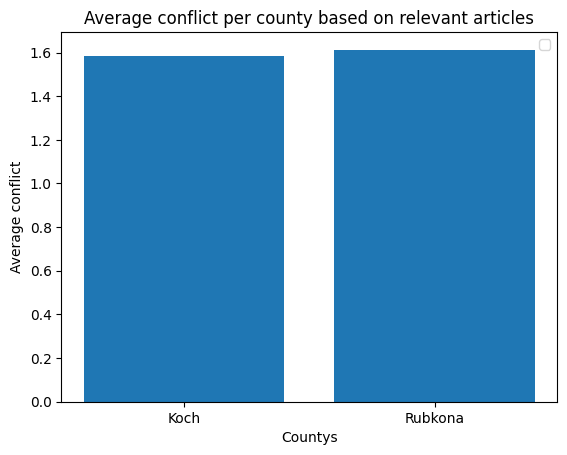

In [132]:
# Initialize a dataframe
df_barplot = pd.DataFrame()

# df_barplot["County"] = ["Koch", "Rubkona", "Parieng", "Mayiandit"]
# df_barplot["Average conflict"] = [koch_mean_conflict, rubkona_mean_conflict, parieng_mean_conflict, mayiandit_mean_conflict]

df_barplot["County"] = ["Koch", "Rubkona"]
df_barplot["Average conflict"] = [koch_mean_conflict, rubkona_mean_conflict]

# Create a barplot
plt.bar(df_barplot["County"], df_barplot["Average conflict"])

plt.xlabel('Countys')
plt.ylabel('Average conflict')
plt.title('Average conflict per county based on relevant articles')
plt.legend()

plt.show()

### Create a barplot of all county's which have a count of several keywords used in articles related to them

In [133]:
# Count keywords in koch articles
koch_rebel = 0
koch_conflict = 0
koch_army = 0
koch_rape = 0

for row in df_koch["Additional Notes"]:
    if "rebel" in row.lower():
        koch_rebel += 1
    elif "conflict" in row.lower():
        koch_conflict += 1
    elif "army" in row.lower():
        koch_army += 1
    elif "rape" in row.lower() or "raping" in row.lower():
        koch_rape += 1

# Count keywords in Rubkona articles
rubkona_rebel = 0
rubkona_conflict = 0
rubkona_army = 0
rubkona_rape = 0

for row in df_rubkona["Additional Notes"]:
    if "rebel" in row.lower():
        rubkona_rebel += 1
    elif "conflict" in row.lower():
        rubkona_conflict += 1
    elif "army" in row.lower():
        rubkona_army += 1
    elif "rape" in row.lower() or "raping" in row.lower():
        rubkona_rape += 1

values1 = [koch_rebel, rubkona_rebel]
values2 = [koch_conflict, rubkona_conflict]
values3 = [koch_army, rubkona_army]
values4 = [koch_rape, rubkona_rape]

categories = ["Koch", "Rubkona"]

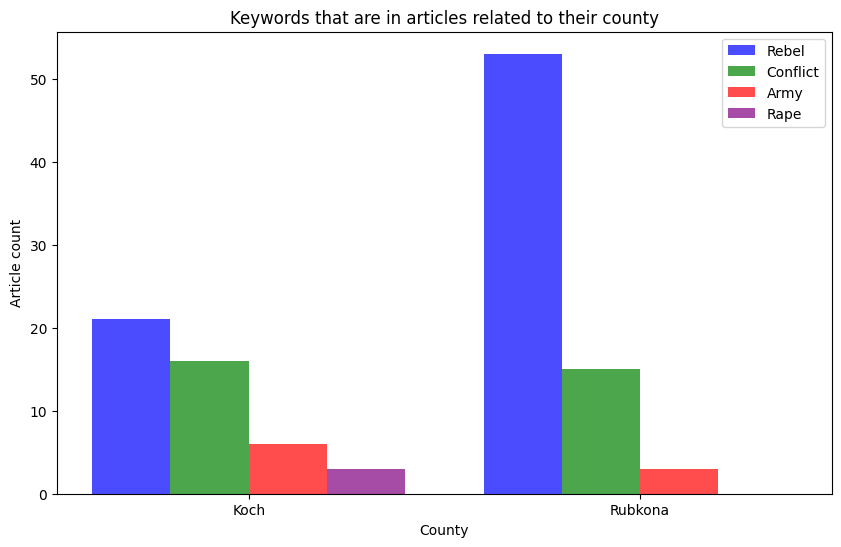

In [136]:
# Create a bar plot with four variables
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(categories))

plt.bar(index, values1, bar_width, label='Rebel', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], values2, bar_width, label='Conflict', color='green', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], values3, bar_width, label='Army', color='red', alpha=0.7)
plt.bar([i + 3 * bar_width for i in index], values4, bar_width, label='Rape', color='purple', alpha=0.7)

plt.xlabel('County')
plt.ylabel('Article count')
plt.title('Keywords that are in articles related to their county')
plt.xticks([i + 1.5 * bar_width for i in index], categories)
plt.legend()

plt.show()